In [1]:
# Include sslearn folder
import sys

sys.path.append('../../../sslearn')
import os
import pickle as pkl
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
from SequenceEncoding import SequenceEncoding
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,
                              StackingClassifier)
from sklearn.exceptions import DataConversionWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import (StratifiedKFold, StratifiedShuffleSplit,
                                     train_test_split)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sslearn.base import OneVsRestSSLClassifier
from sslearn.wrapper import CoTraining

In [2]:
# results_dir = "results/best_model_for_each_encoding_BRCA1_HUMAN_Fields2015_e3"
results_dir = "results/best_model_for_each_encoding_avgfp"

In [3]:
encodings = ["One_hot", "One_hot_6_bit", "Binary_5_bit", "Hydrophobicity_matrix",
             "Meiler_parameters", "Acthely_factors", "PAM250", "BLOSUM62",
             "Miyazawa_energies", "Micheletti_potentials", "AESNN3",
             "ANN4D", "ProtVec"]

models = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              LogisticRegression(max_iter=10000),
              MLPClassifier(max_iter=10000),
              AdaBoostClassifier(),
              SVC(kernel='linear', probability=True)]

subsample_sizes = [1, 0.5, 0.25, 0.15, 0.1, 0.05, 0.03, 0.01]

In [4]:
global_pred_dict = dict()

for enc in encodings:
    global_pred_dict[enc] = dict()
    for model in models:
        global_pred_dict[enc][model] = dict()
        for subsample_size in subsample_sizes:
            with open(f'{results_dir}/pred_dict_{enc}_{subsample_size}_{model}.pickle', 'rb') as f:
                global_pred_dict[enc][model][subsample_size] = pkl.load(f)

# Create results dataframe
df = pd.DataFrame(columns=['Labeled', 'Model','Train_size', 'View', 'AUC', 'Spearman_r'])
for view, models in global_pred_dict.items():
    for model, labeled_sizes in models.items():
        for labeled_size, preds_list in labeled_sizes.items():
            for preds in preds_list:
                y_proba = preds["y_proba"]
                original_y_test = preds["original_y_test"]
                y_test = preds["y_test"]
                train_size = preds["train_len"]
                auc = roc_auc_score(y_test, y_proba)
                spearman_r = spearmanr(original_y_test, y_proba)[0]
                df = pd.concat([df, pd.DataFrame({  'Labeled': labeled_size, 
                                                    'Model': str(model),
                                                    'Train_size': train_size, 
                                                    'View': view, 
                                                    'AUC': auc, 
                                                    'Spearman_r': spearman_r
                                                    }, index=[0])], ignore_index=True)

/home/jabarbero/anaconda3/envs/estancia/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [8]:
# Show entire dataframe
pd.set_option('display.max_rows', df.shape[0]+1)
df

,Labeled,Model,Train_size,View,AUC,Spearman_r,Mean_train_size,Labeled_Train_size
0,1,DecisionTreeClassifier(),26088,One_hot,0.751572,0.547387,26088,1\n\n26088
1,1,DecisionTreeClassifier(),26088,One_hot,0.742677,0.531663,26088,1\n\n26088
2,1,DecisionTreeClassifier(),26088,One_hot,0.751547,0.537888,26088,1\n\n26088
3,1,DecisionTreeClassifier(),26088,One_hot,0.745413,0.535195,26088,1\n\n26088
4,1,DecisionTreeClassifier(),26088,One_hot,0.743265,0.541995,26088,1\n\n26088
5,0.5,DecisionTreeClassifier(),13044,One_hot,0.717316,0.491240,13044,0.5\n\n13044
6,0.5,DecisionTreeClassifier(),13044,One_hot,0.724473,0.496107,13044,0.5\n\n13044
7,0.5,DecisionTreeClassifier(),13044,One_hot,0.749403,0.553153,13044,0.5\n\n13044
8,0.5,DecisionTreeClassifier(),13044,One_hot,0.730296,0.516275,13044,0.5\n\n13044
9,0.5,DecisionTreeClassifier(),13044,One_hot,0.752777,0.537491,13044,0.5\n\n13044


In [6]:
selected_metric = "AUC"
#selected_metric = "Spearman_r"

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


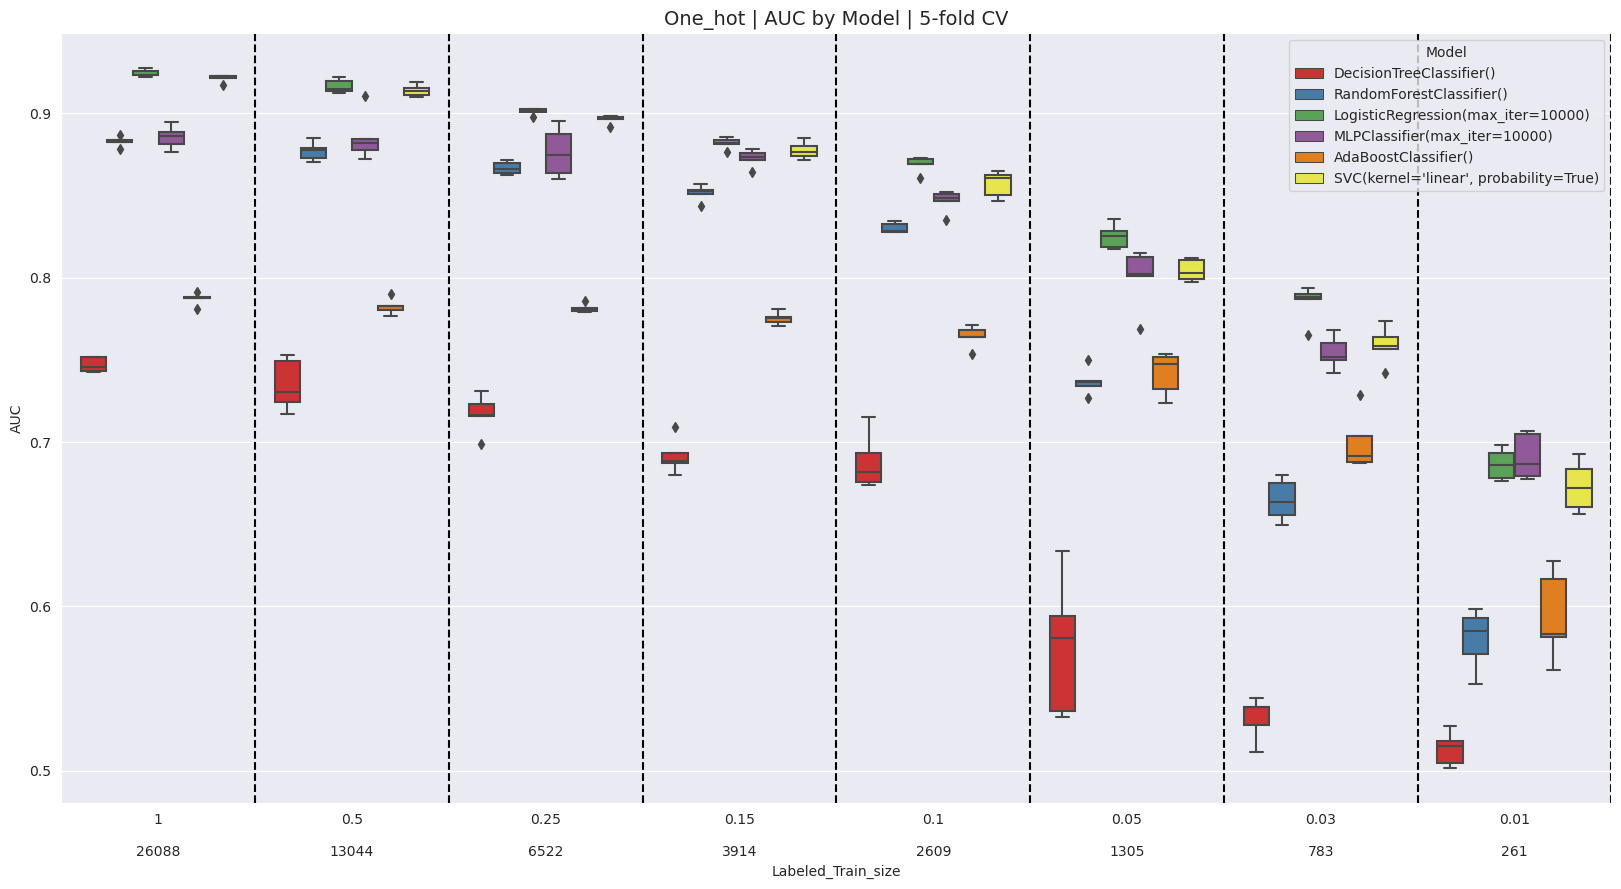

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


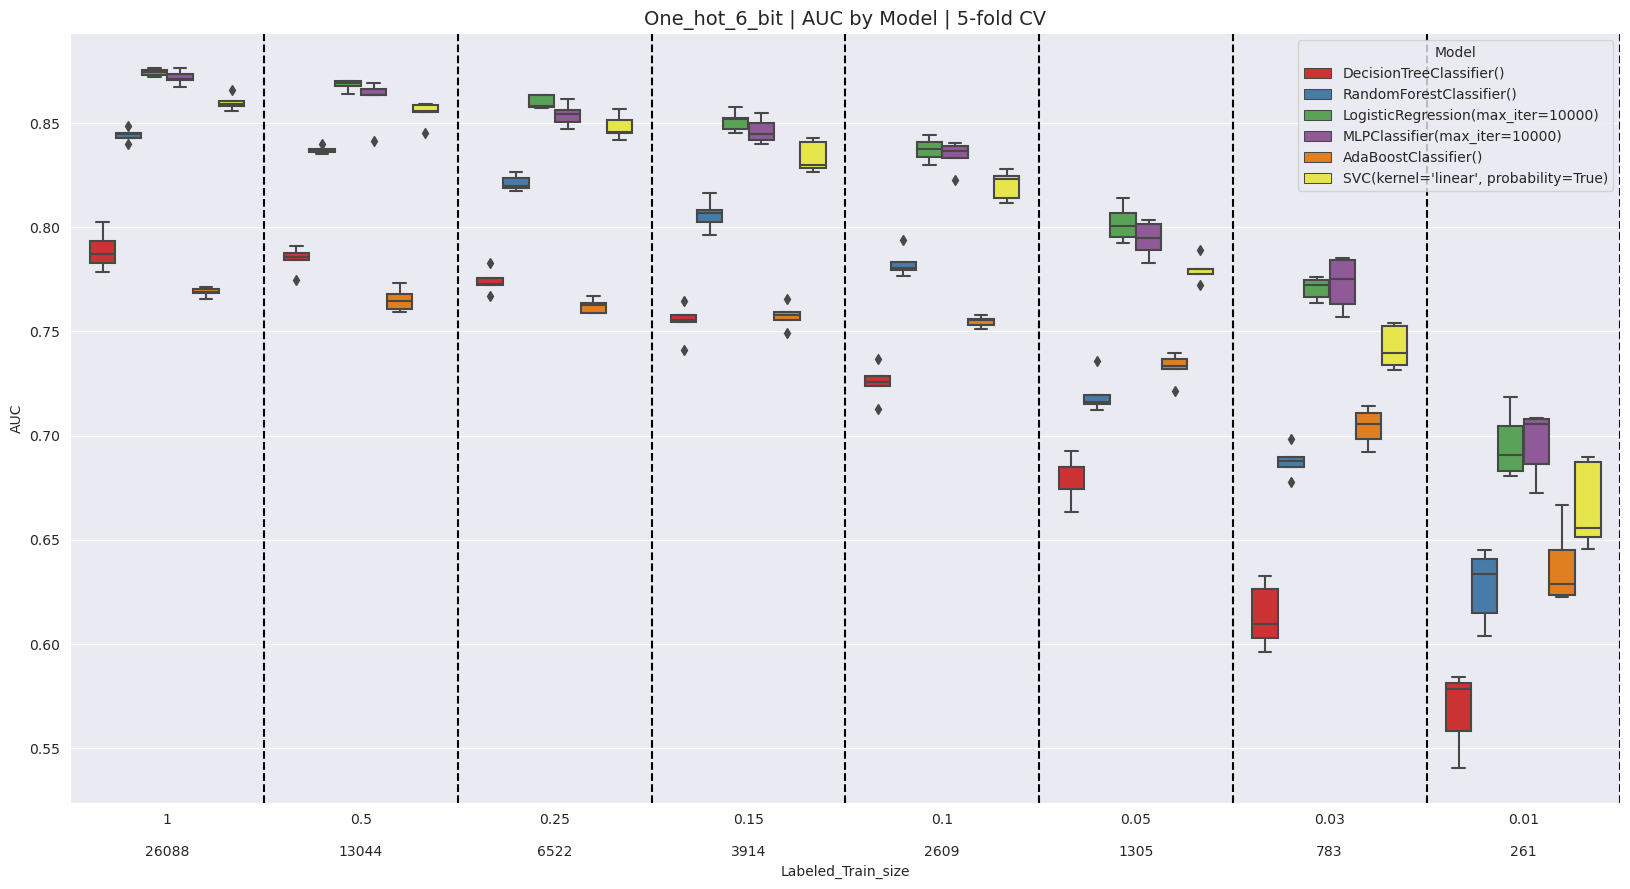

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


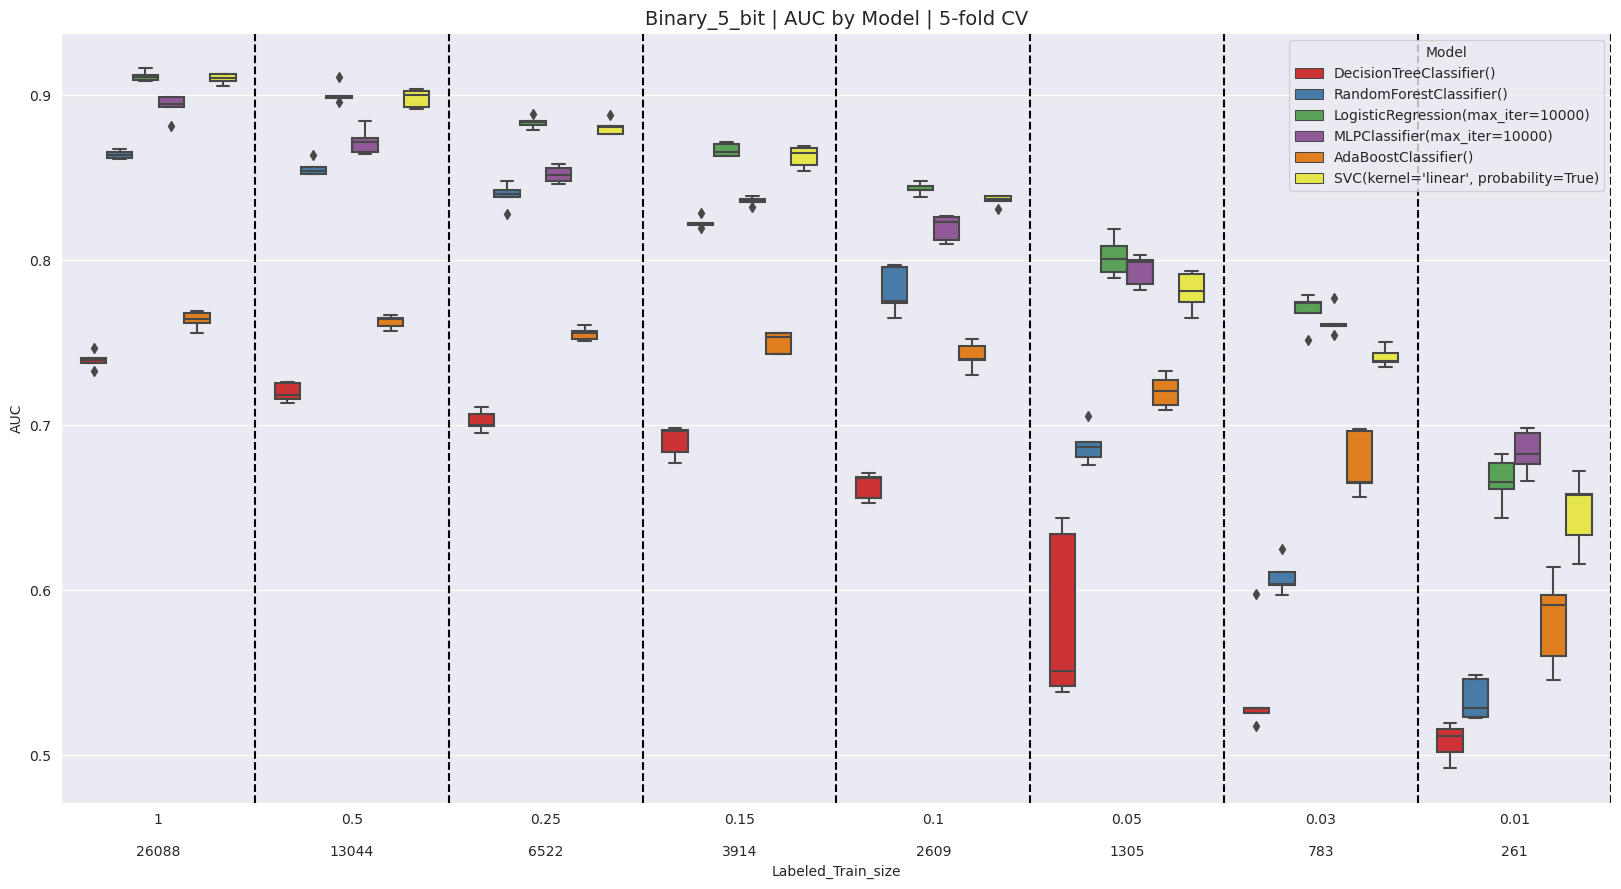

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


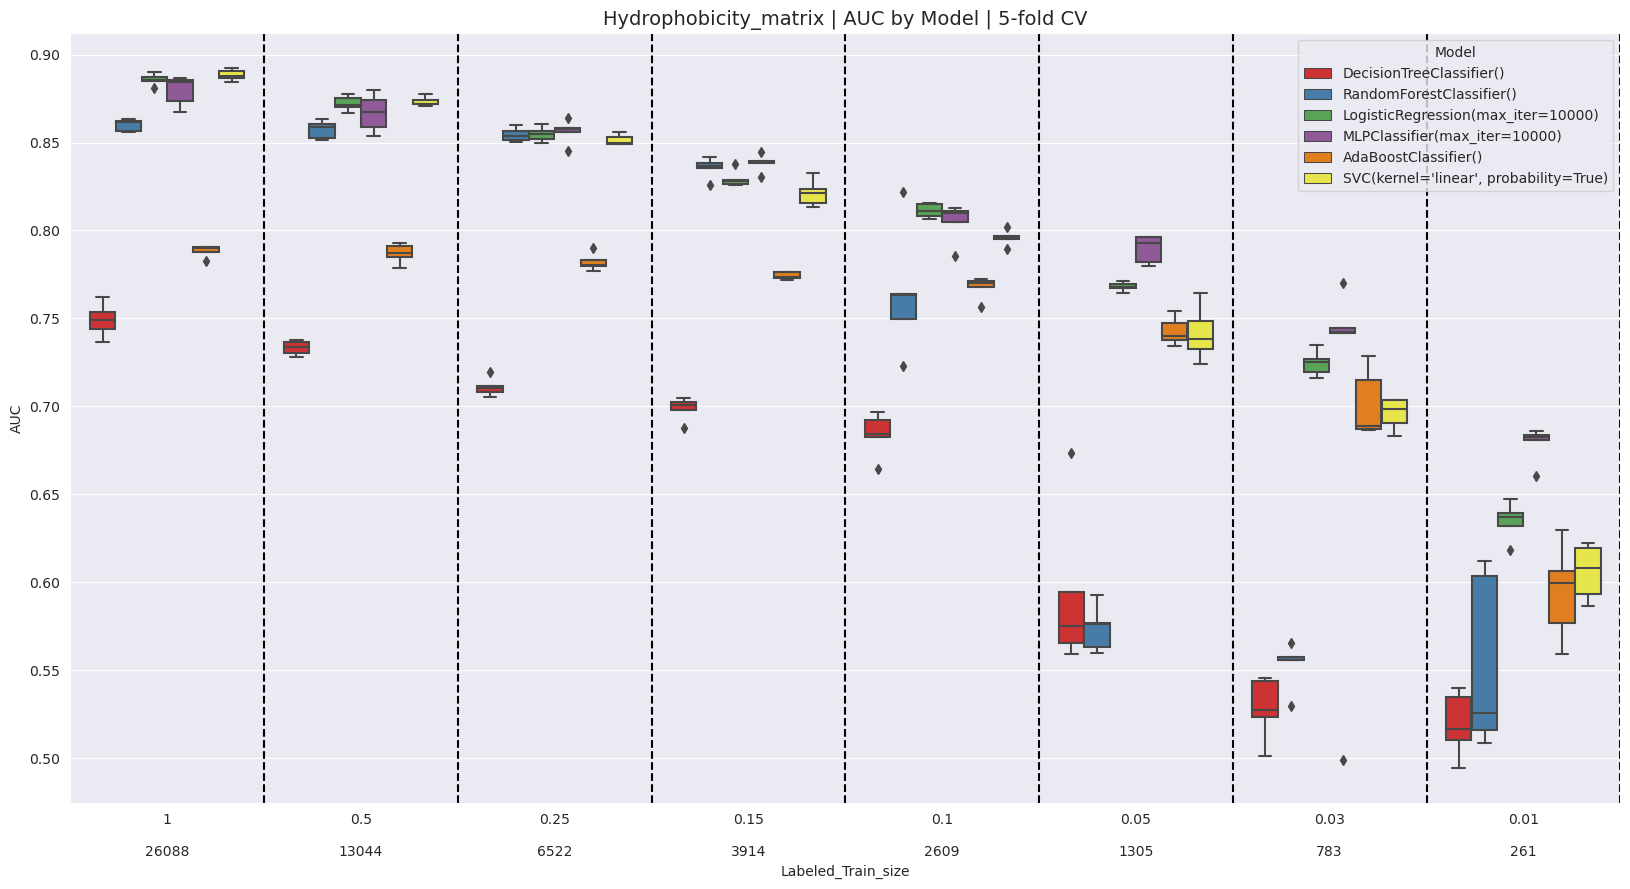

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


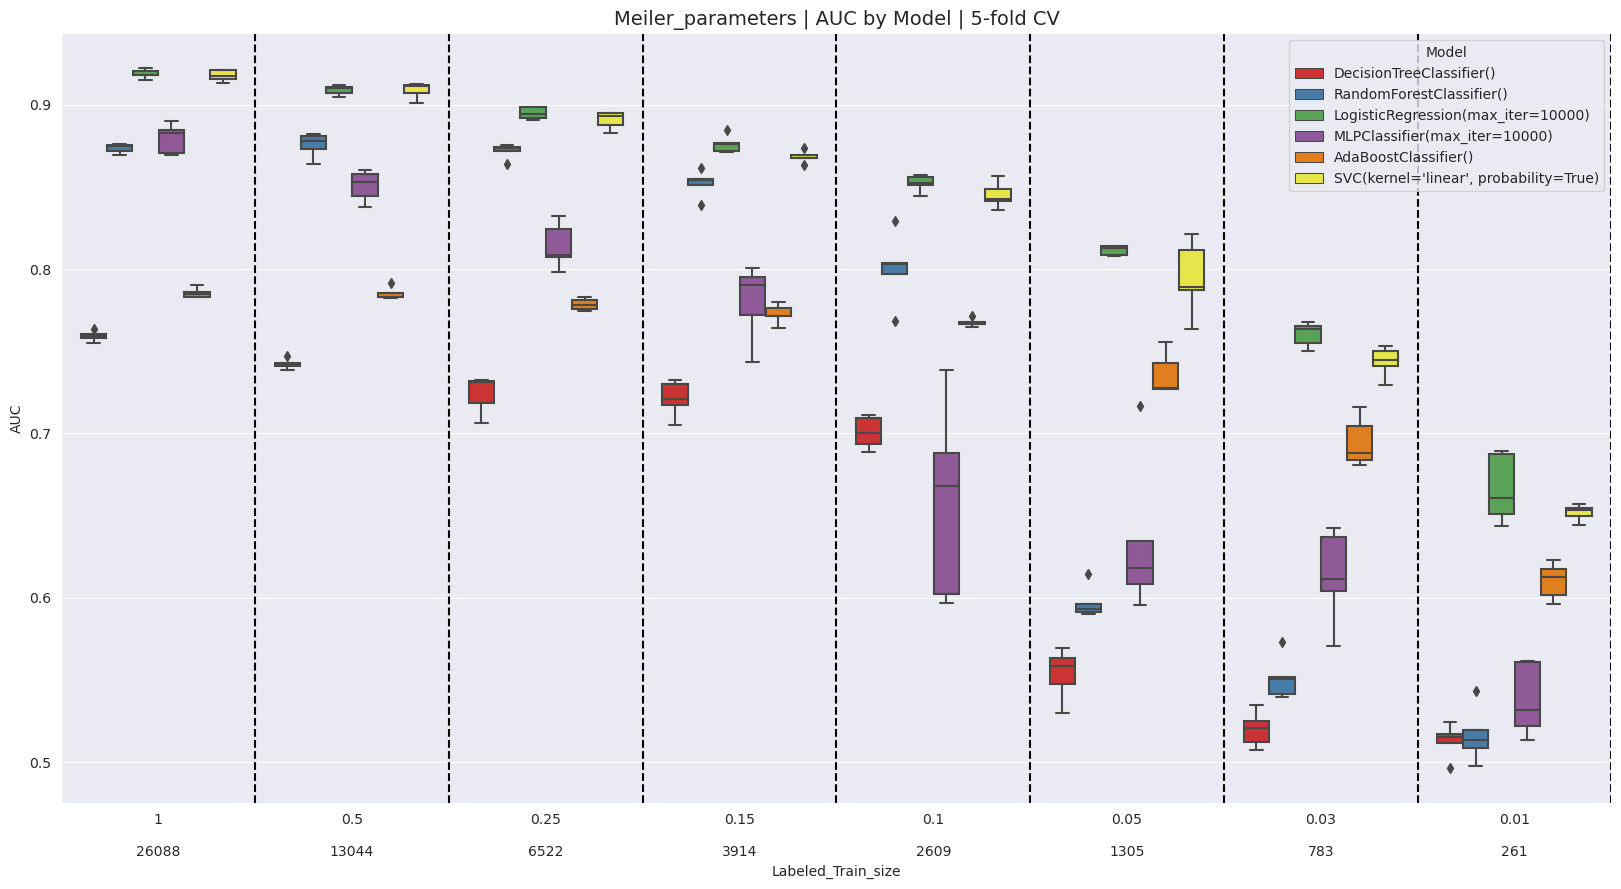

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


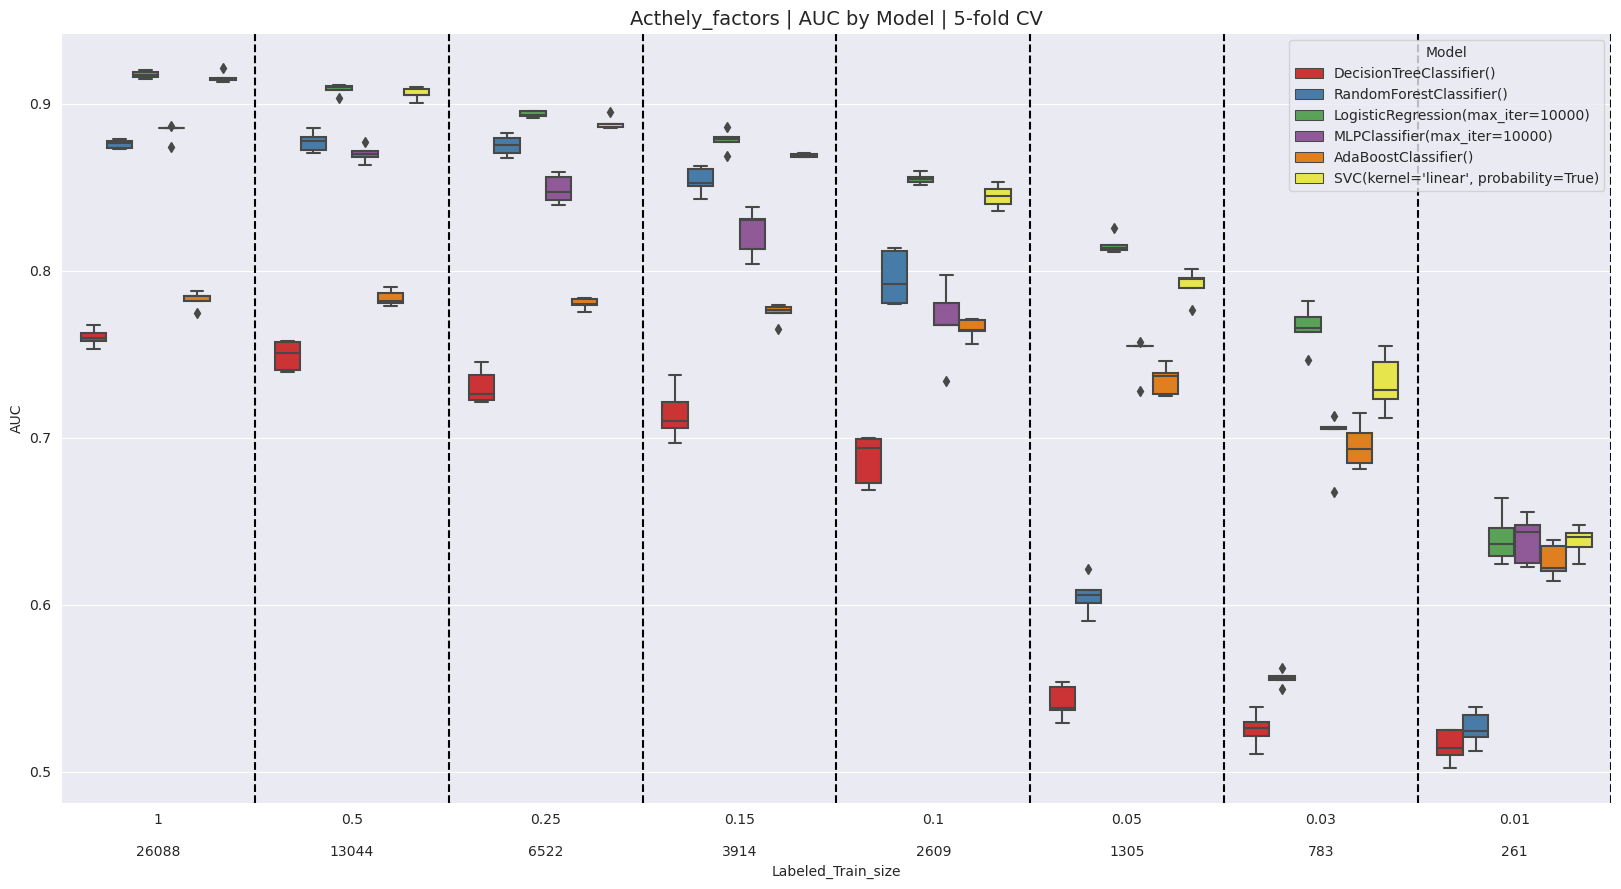

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


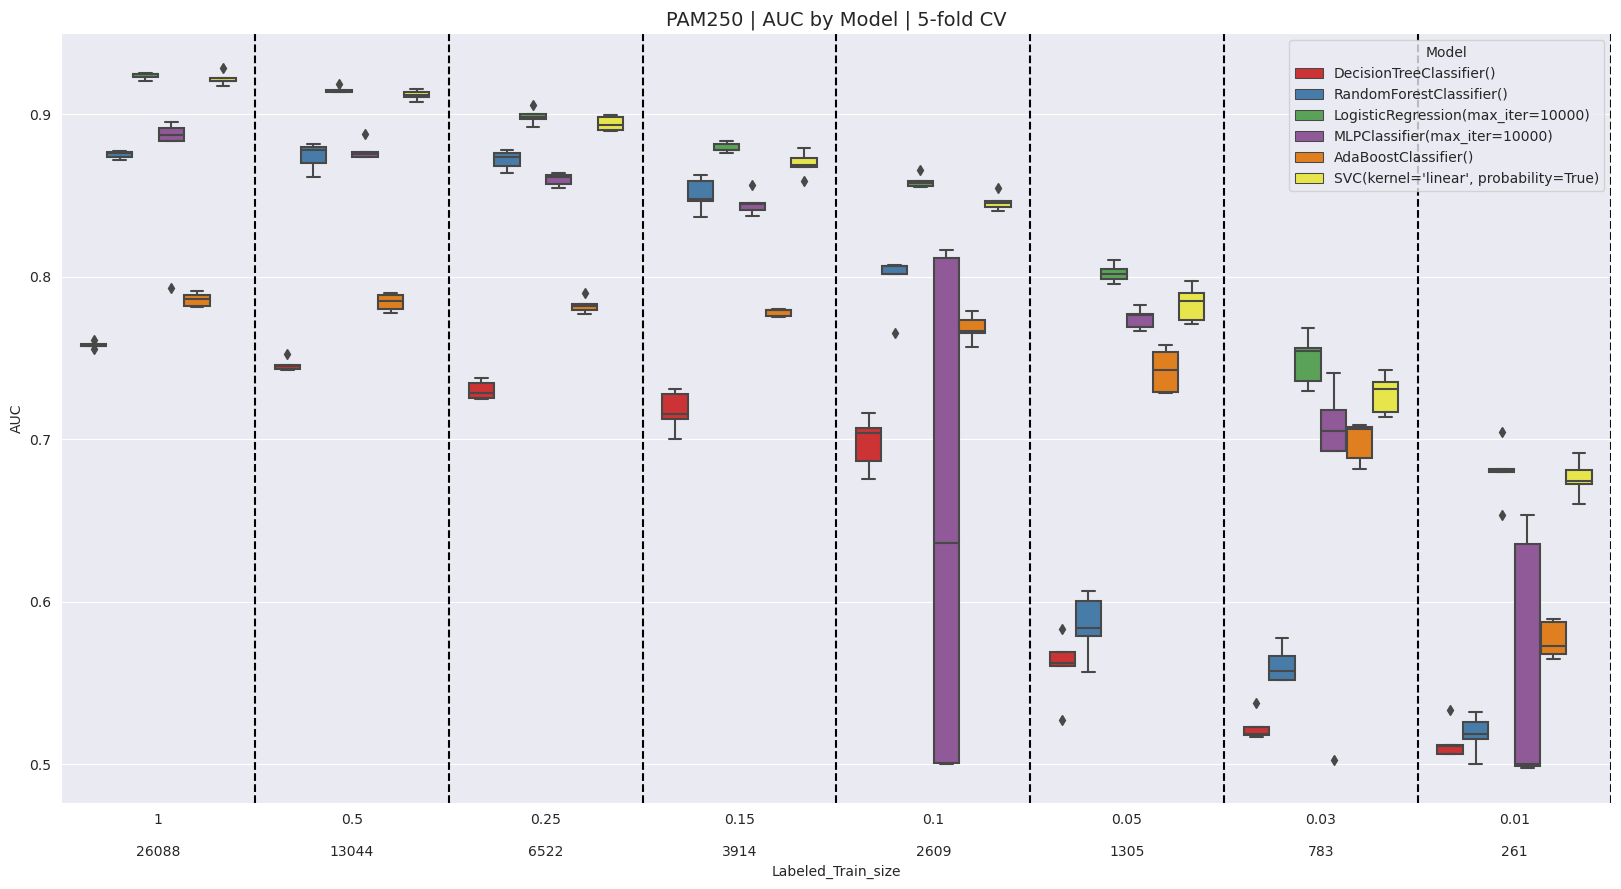

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


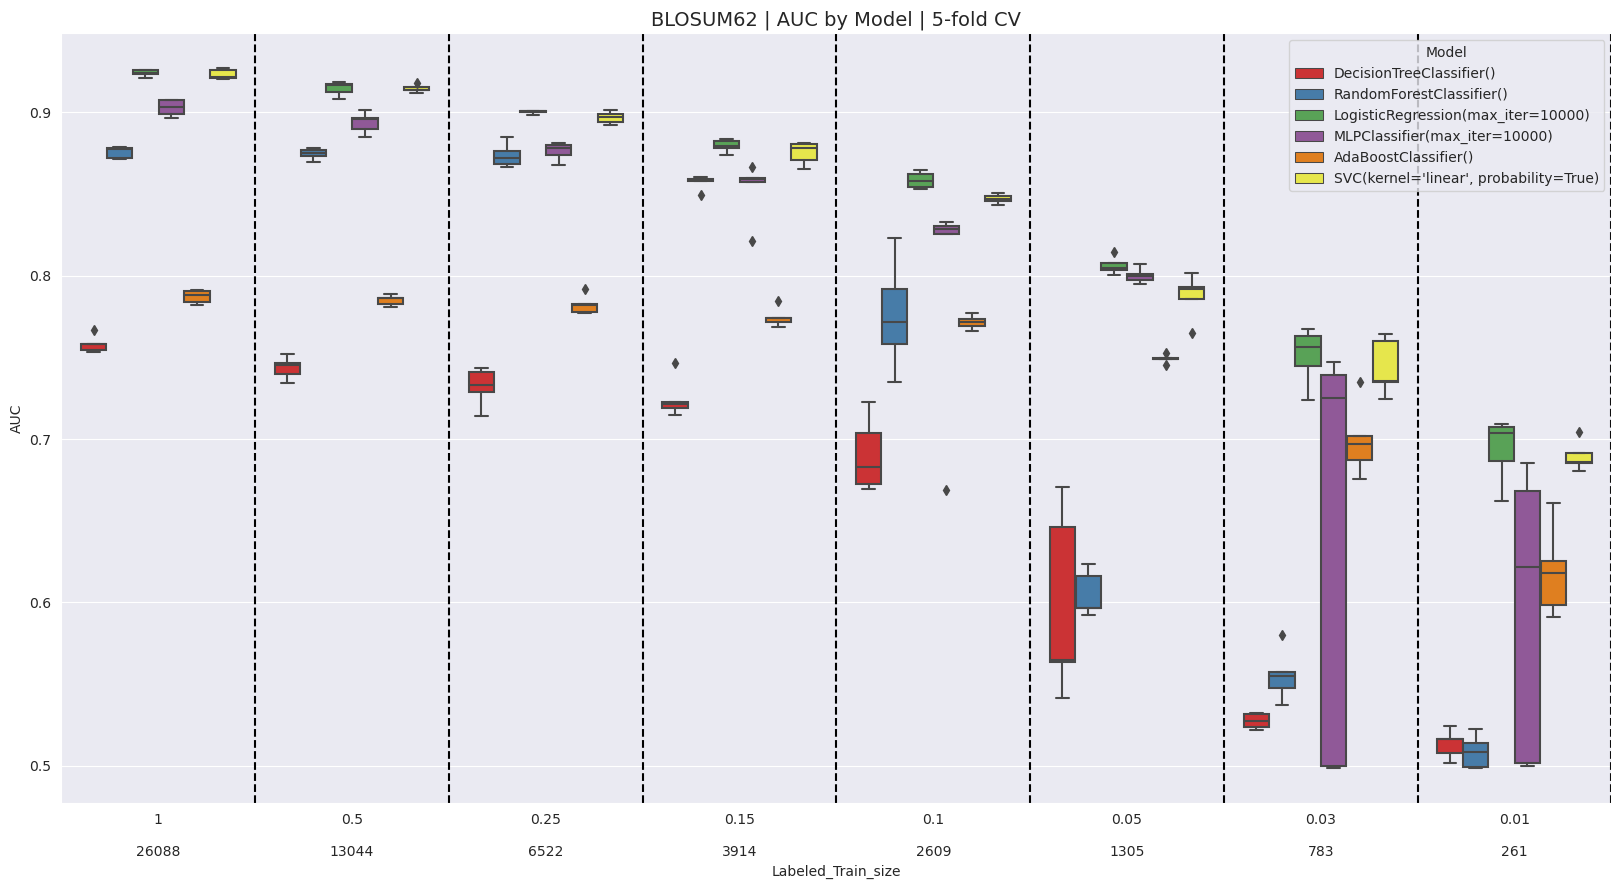

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


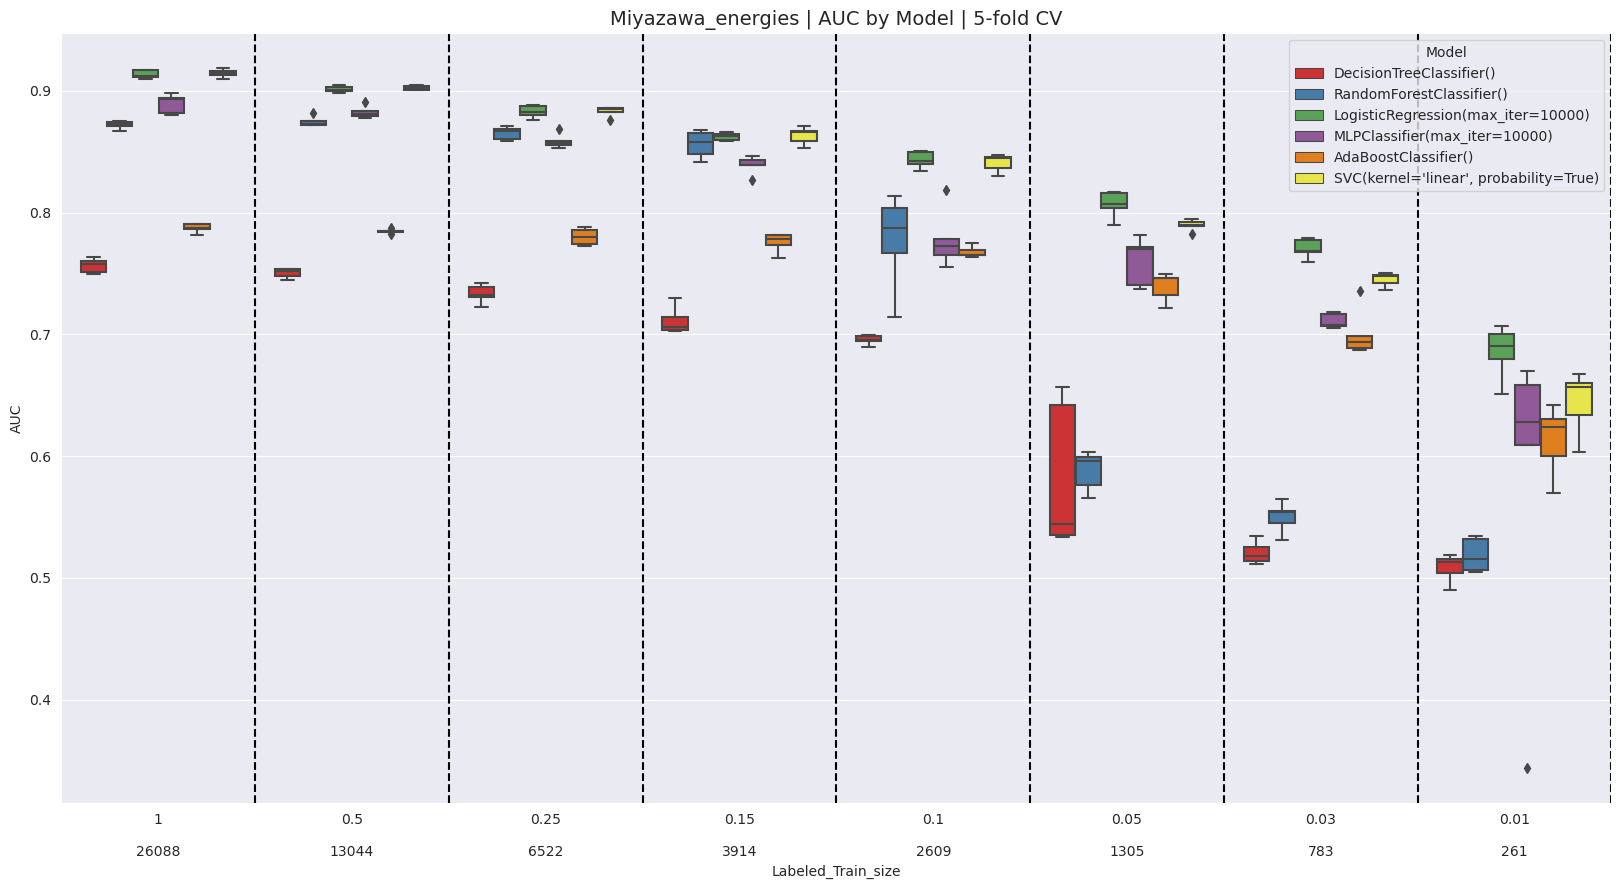

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


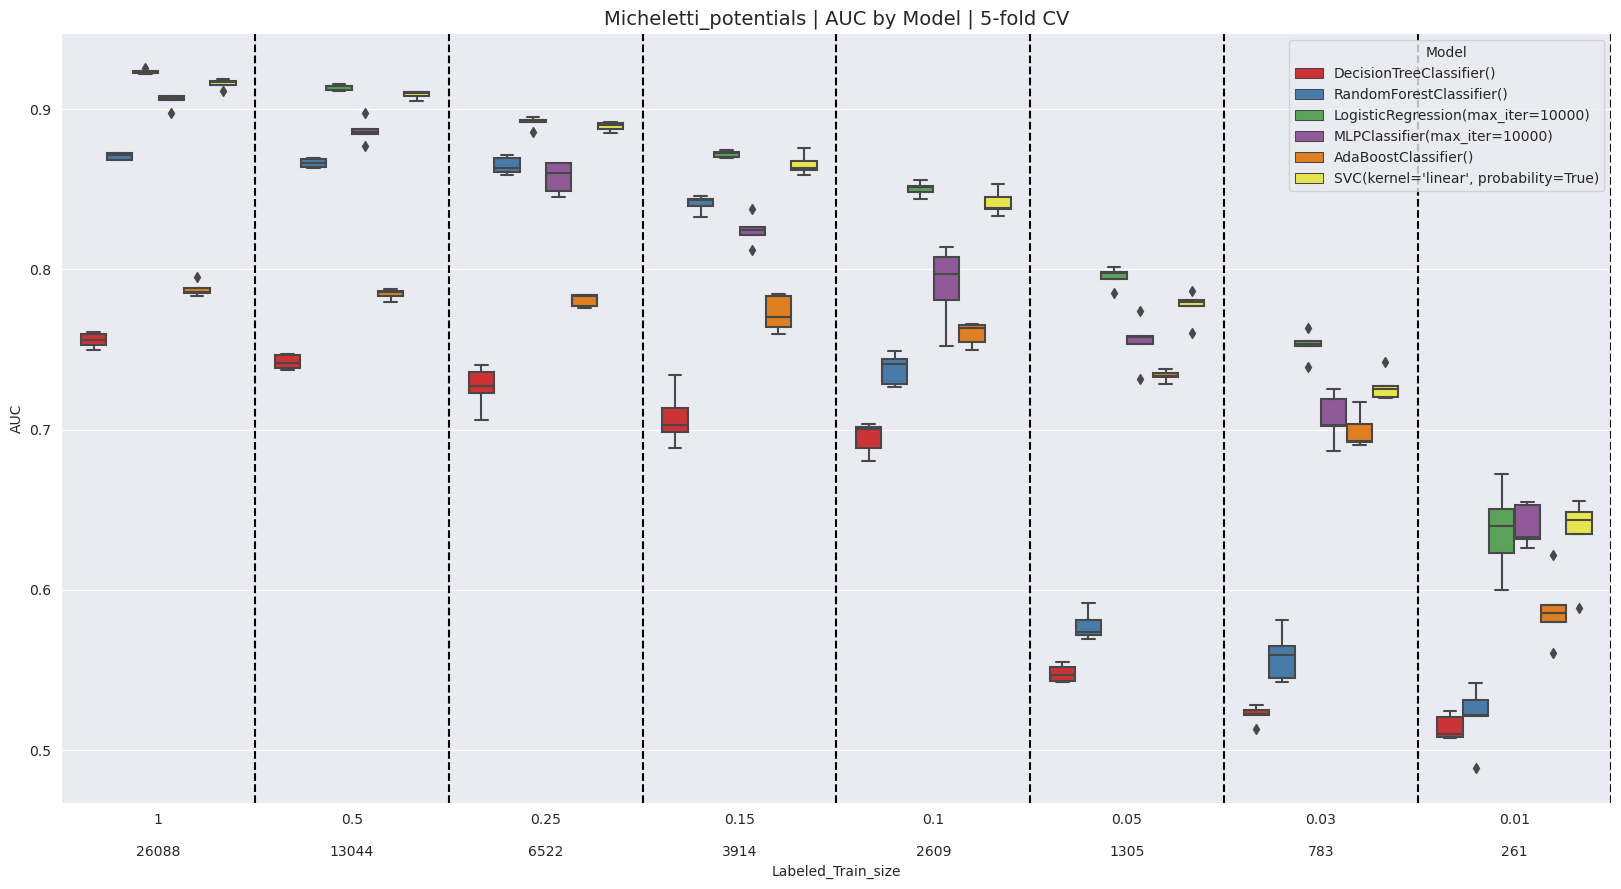

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


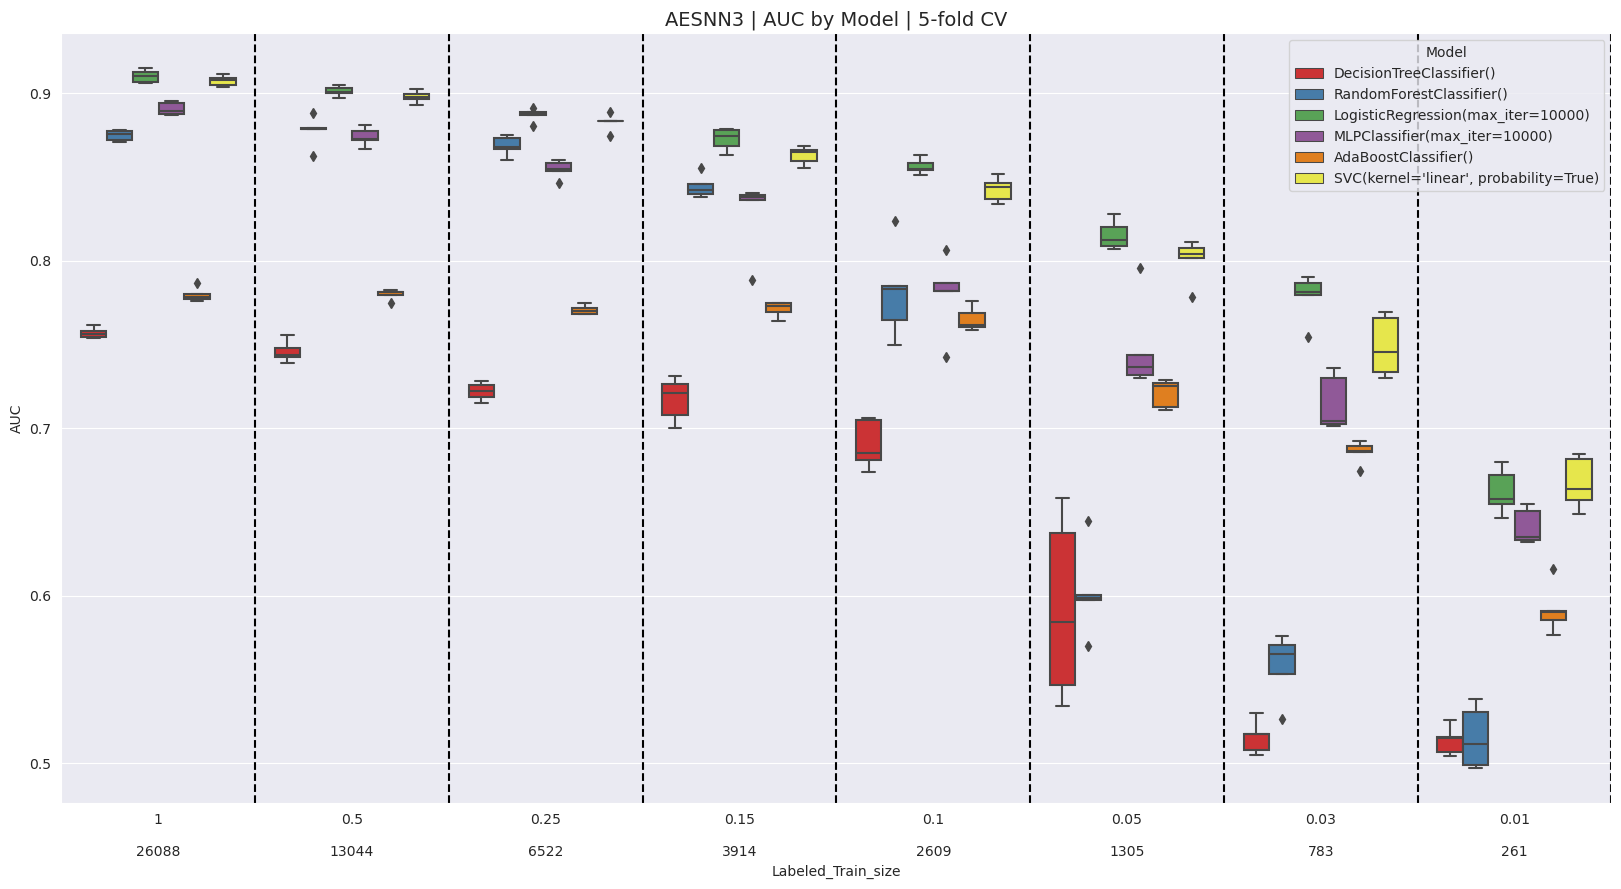

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


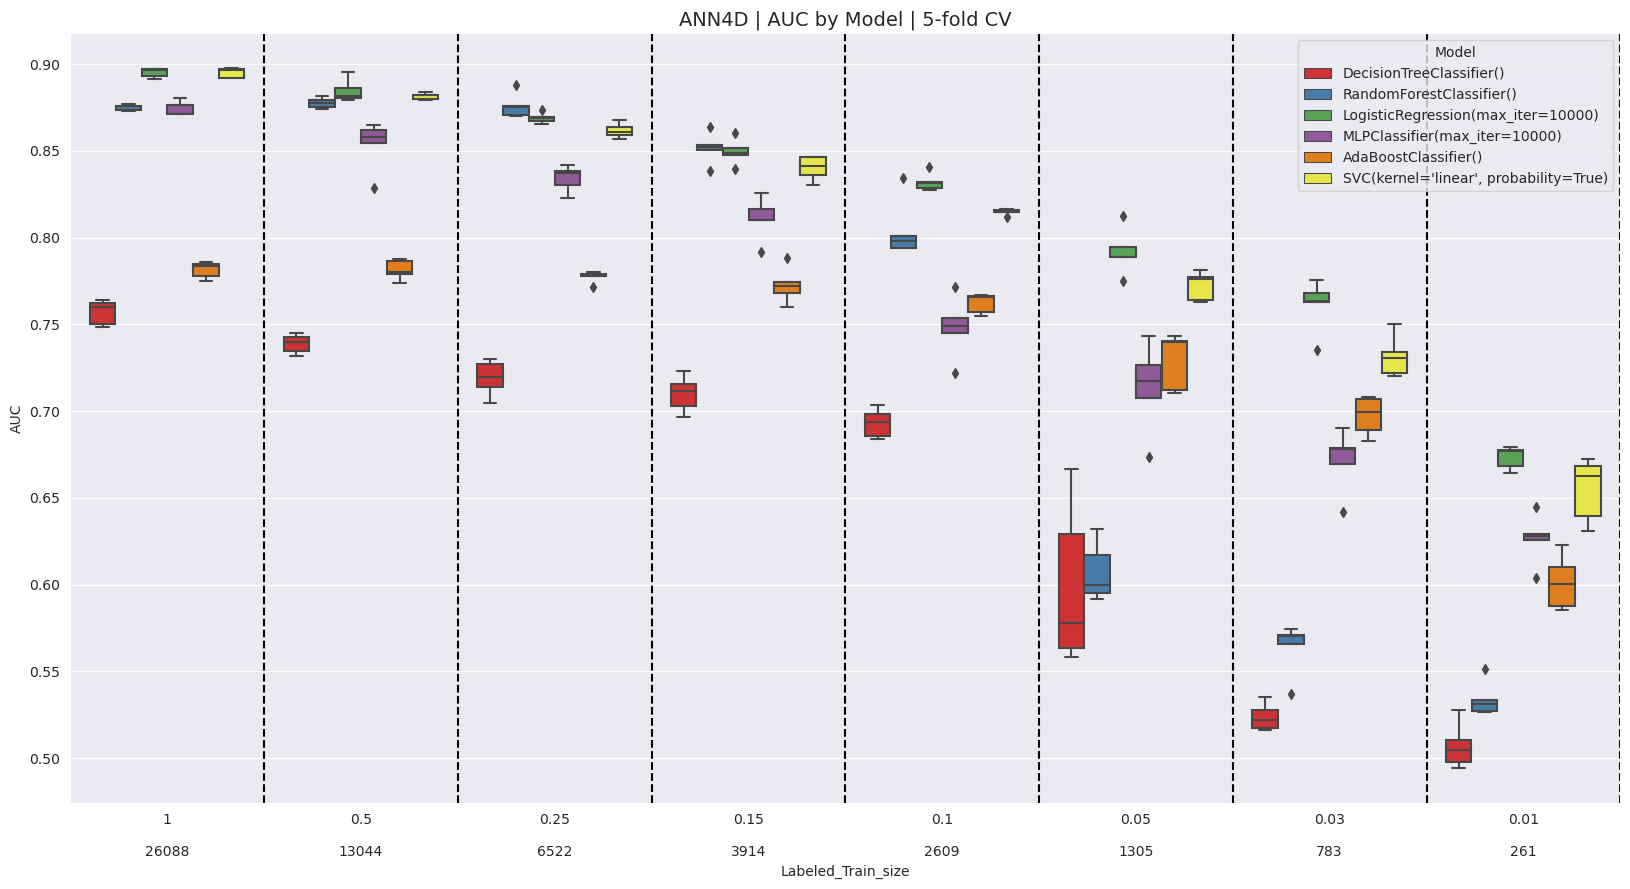

/tmp/ipykernel_1201085/1657480344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
/tmp/ipykernel_1201085/1657480344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)


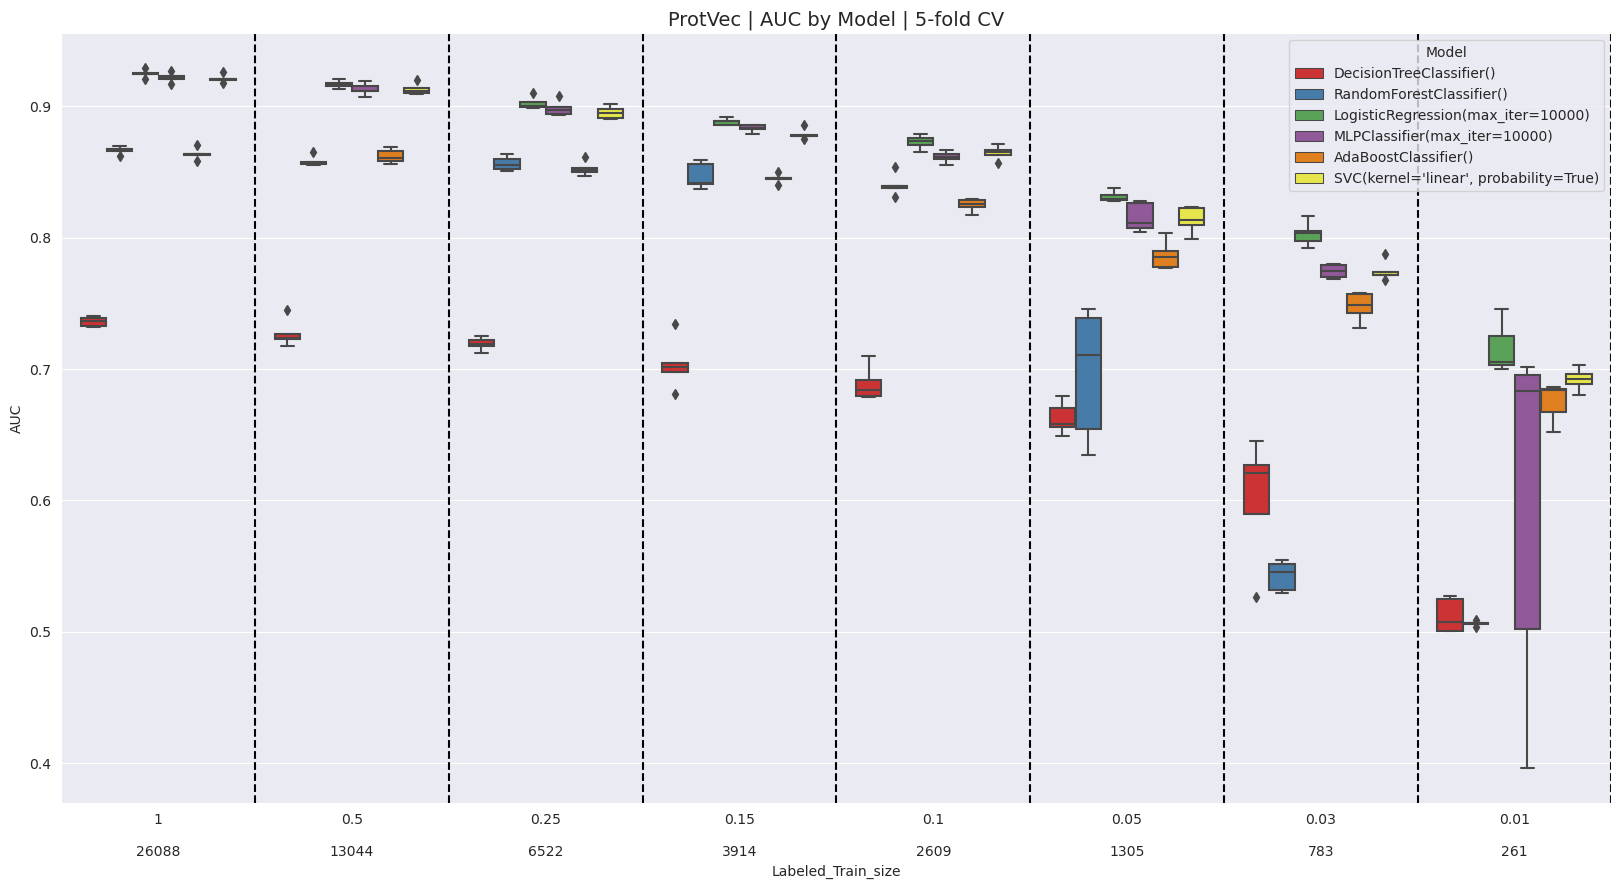

In [9]:
for enc in encodings:
    # Boxplot for folds aucs
    plt.figure(figsize=(20, 10))

    boxplot_df = df.loc[(df["View"] == enc)]
    boxplot_df['Mean_train_size'] = boxplot_df.groupby(['Labeled', 'View'])['Train_size'].transform('mean').round(0).astype(int)
    boxplot_df['Labeled_Train_size'] = boxplot_df['Labeled'].astype(str) + '\n\n' + boxplot_df['Mean_train_size'].astype(str)
    # Boxplot grouped by labeled
    # Vertical and horizontal grid background
    sns.set_style("darkgrid")
    sns.boxplot(x="Labeled_Train_size", y=selected_metric, hue="Model", data=boxplot_df, palette="Set1")
    [plt.axvline(x+0.5, color = 'black', linestyle='--') for x in range(len(labeled_sizes))]
    plt.title(f'{enc} | {selected_metric} by Model | 5-fold CV', fontsize=14)
    plt.show()

array([1, 0.5, 0.25, 0.15, 0.1, 0.05, 0.03, 0.01], dtype=object)